# СКБ201 Тур
<p> Модуль синтеза речи или модуль искусственного интелекта </p>
<p> Тестовое задание на роль: ML-разработчик </p>

## Навигация
* [Модуль искусственного интелекта](#task1)
    * [Задание 1](#task1p1)
* [Модуль искусственного интелекта и модуль синтеза речи](#task2)
    * [Задание 1](#task2p1)
    * [Задание 2](#task2p2)
    * [Задание 3](#task2p3)
    * [Задание 4](#task2p4)
    * [Задание 5 (основное задание)](#task2p5)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Модуль искусственного интелекта <a class="anchor" id="task1"></a>
1) <a class="anchor" id="task1p1"></a> Напишите функцию, возвращающую округленную взвешенную сумму оценок по данным оценкам и весам 

In [16]:
def result_mark(weights: np.array, marks: np.array) -> int:
    # я не совсем уверен, если нужны все эти проверки, так что 2 версии
    if len(weights.shape)!=1 or len(marks.shape)!=1 or \
        len(weights)!=len(marks) or  sum(weights)!=1 or \
        True in (marks>10) or True in (marks<0): 
            raise ValueError
    return (weights@(marks.reshape(-1,1)))[0]

def result_mark_fast(weights: np.array, marks: np.array) -> int:
    return (weights@(marks.reshape(-1,1)))[0]

In [17]:
marks = np.arange(1,11)
weights = np.arange(1,11)/sum(marks)

%timeit result_mark(weights, marks)
%timeit result_mark_fast(weights, marks)
result_mark(weights, marks), result_mark_fast(weights, marks)

14 µs ± 1.3 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
2.21 µs ± 243 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


(7.0, 7.0)

## Модуль искусственного интелекта и модуль синтеза речи <a class="anchor" id="task2"></a>
1) <a class="anchor" id="task2p1"></a> Прочитайте средствами pandas файл с данными по ссылке. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер). 

In [7]:
url = 'https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv'
df0 = pd.read_csv(url)
df0

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


2) <a class="anchor" id="task2p2"></a> Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [8]:
np.nan in df0, None in df0

(False, False)

In [9]:
for i in df0.columns:
    print('->', i, ':', df0[i].unique(), '\n')

-> status : ['no checking account' '... < 0 DM'
 '... >= 200 DM / salary for at least 1 year' '0<= ... < 200 DM'] 

-> duration : [18  9 12 10  8  6 24 11 30 48 36 15 42 21 27 33 28  4 47 14 39 60  5 22
 54 13 16  7 20 26 45 72 40] 

-> credit_history : ['all credits at this bank paid back duly'
 'no credits taken/all credits paid back duly'
 'existing credits paid back duly till now'
 'delay in paying off in the past'
 'critical account/other credits elsewhere'] 

-> purpose : ['car (used)' 'others' 'retraining' 'furniture/equipment' 'car (new)'
 'business' 'domestic appliances' 'radio/television' 'repairs' 'vacation'] 

-> amount : [ 1049  2799   841  2122  2171  2241  3398  1361  1098  3758  3905  6187
  1957  7582  1936  2647  3939  3213  2337  7228  3676  3124  2384  1424
  4716  4771   652  1154  3556  4796  3017  3535  6614  1376  1721   860
  1495  1934  3378  3868   996  1755  1028  2825  1239  1216  1258  1864
  1474  1382   640  3919  1224  2331  6313   385  1655  1053  3160

* Пропусков данных нет
* Категории признаков (не совсем понятно что такое "порядковые", предположу что это как категориальные, только их можно упорядочить):
    * status: порядковые
    * duration: количественный
    * credit_history: категориальный
    * purpose: категориальные
    * amount: количественные
    * savings: порядковые
    * employment_duration: порядковые
    * installment_rate: порядковые
    * personal_status_sex: категориальный
    * other_debtors: категориальные
    * present_residence: порядковые
    * property: категориальные
    * age: количественный
    * other_installment_plans: категориальные
    * housing: категориальные
    * number_credits: порядковые
    * job: категориальные
    * people_liable: порядковые
    * telephone: бинарные
    * foreign_worker: бинарные
    * credit_risk: бинарные

3) <a class="anchor" id="task2p3"></a> Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [10]:
df0[['purpose', 'amount']].groupby('purpose').mean()

,amount
purpose,
business,8209.333333
car (new),5370.223301
car (used),3066.983425
domestic appliances,2728.090909
furniture/equipment,2487.685714
others,3062.948718
radio/television,1498.000000
repairs,3180.400000
retraining,4158.041237


4) <a class="anchor" id="task2p4"></a> Используя numpy и matplotlib постройте график функций $\sin(x)$ и $\cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой

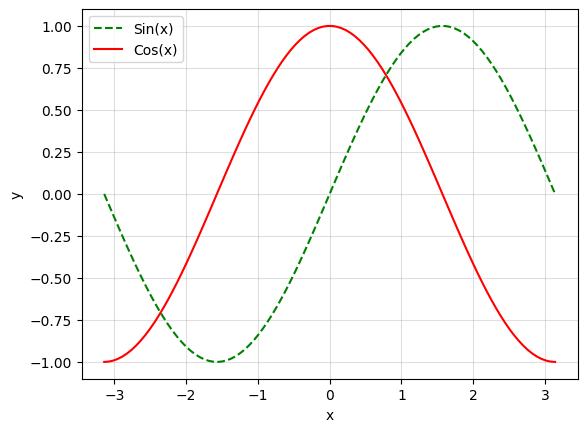

In [11]:
X = np.linspace(-np.pi, np.pi, 100)
Y1 = np.sin(X)
Y2 = np.cos(X)
plt.plot(X, Y1, 'g--', label = 'Sin(x)')
plt.plot(X, Y2, 'r',   label = 'Cos(x)')
plt.grid(alpha = 0.4)
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

5) <a class="anchor" id="task2p5"></a> Анализ данных, попытка предложить формулу оценки надежности

In [58]:
status_mod = ['no checking account', '... < 0 DM',
              '0<= ... < 200 DM', '... >= 200 DM / salary for at least 1 year']
# duration
credit_history_mod = ['critical account/other credits elsewhere', 'delay in paying off in the past', 
                      'existing credits paid back duly till now', 'all credits at this bank paid back duly',
                      'no credits taken/all credits paid back duly']
purpose_mod = ['car (used)', 'others', 'retraining', 'furniture/equipment', 'car (new)',
               'business', 'domestic appliances', 'radio/television', 'repairs', 'vacation']
# amount
savings_mod = ['unknown/no savings account', '... <  100 DM', '100 <= ... <  500 DM',
               '500 <= ... < 1000 DM', '... >= 1000 DM']
employment_duration_mod = ['unemployed', '< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '>= 7 yrs']
installment_rate_mod = ['< 20', '20 <= ... < 25', '25 <= ... < 35', '>= 35']
personal_status_sex_mod = ['female : non-single or male : single', 'male : married/widowed',
                           'female : single', 'male : divorced/separated']
other_debtors_mod = ['none', 'guarantor', 'co-applicant']
present_residence_mod = ['< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '>= 7 yrs']
property_mod = ['car or other', 'unknown / no property',
            'building soc. savings agr./life insurance', 'real estate']
# age
other_installment_plans_mod = ['none', 'bank', 'stores']
housing_mod = ['for free', 'rent', 'own']
number_credits_mod = ['1', '2-3', '4-5', '>= 6']
job_mod = ['unemployed/unskilled - non-resident', 'unskilled - resident',
           'skilled employee/official', 'manager/self-empl./highly qualif. employee']
people_liable_mod = ['0 to 2', '3 or more']
telephone_mod = ['no', 'yes (under customer name)']
foreign_worker_mod = ['no', 'yes']
credit_risk_mod = ['bad', 'good']

mods = {'status' : lambda x: status_mod.index(x),
        'duration' : lambda x: x,
        'credit_history' : lambda x: credit_history_mod.index(x),
        'purpose' : lambda x: purpose_mod.index(x),
        'amount' : lambda x: x,
        'savings' : lambda x: savings_mod.index(x),
        'employment_duration' : lambda x: employment_duration_mod.index(x),
        'installment_rate' : lambda x: installment_rate_mod.index(x),
        'personal_status_sex' : lambda x: personal_status_sex_mod.index(x),
        'other_debtors' : lambda x: other_debtors_mod.index(x),
        'present_residence' : lambda x: present_residence_mod.index(x),
        'property' : lambda x: property_mod.index(x),
        'age' : lambda x: x,
        'other_installment_plans' : lambda x: other_installment_plans_mod.index(x),
        'housing' : lambda x: housing_mod.index(x),
        'number_credits' : lambda x: number_credits_mod.index(x),
        'job' : lambda x: job_mod.index(x),
        'people_liable' : lambda x: people_liable_mod.index(x),
        'telephone' : lambda x: telephone_mod.index(x),
        'foreign_worker' : lambda x: foreign_worker_mod.index(x),
        'credit_risk' : lambda x: credit_risk_mod.index(x)}

df1 = df0.agg(mods)

In [59]:
df1

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,18,3,0,1049,0,1,0,0,0,...,0,21,0,0,0,2,0,0,0,1
1,0,9,3,1,2799,0,2,2,1,0,...,1,36,0,0,1,2,1,0,0,1
2,1,12,4,2,841,1,3,2,0,0,...,1,23,0,0,0,1,0,0,0,1
3,0,12,3,1,2122,0,2,1,1,0,...,1,39,0,0,1,1,1,0,1,1
4,0,12,3,1,2171,0,2,0,1,0,...,0,38,1,1,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,24,4,3,1987,0,2,2,1,0,...,1,21,0,0,0,1,1,0,0,0
996,0,24,4,1,2303,0,4,0,1,2,...,1,45,0,1,0,2,0,0,0,0
997,3,21,3,1,12680,4,4,0,1,0,...,3,30,0,2,0,3,0,1,0,0
998,1,12,4,3,6468,4,0,2,1,0,...,3,52,0,1,0,3,0,1,0,0


In [60]:
df1g = df1[df1['credit_risk']==1]
df1b = df1[df1['credit_risk']==0]
df1g.shape, df1b.shape

((700, 21), (300, 21))

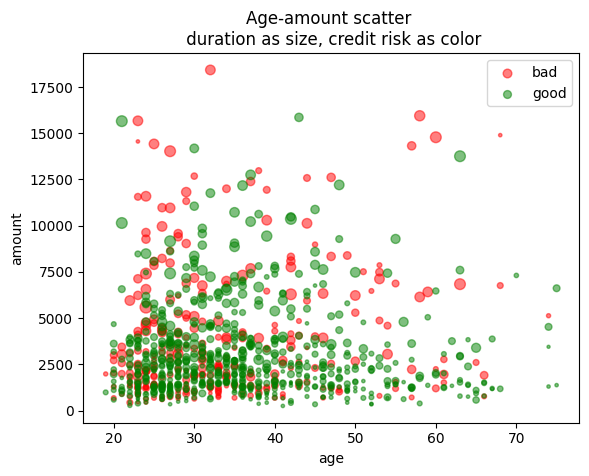

In [70]:
plt.scatter(df1b['age'], df1b['amount'], df1b['duration'], 'r', alpha = 0.5)
plt.scatter(df1g['age'], df1g['amount'], df1g['duration'], 'g', alpha = 0.5)
plt.xlabel('age')
plt.ylabel('amount')
plt.legend(['bad', 'good'])
plt.title('Age-amount scatter \n duration as size, credit risk as color');

C:\Users\64p4h\AppData\Local\Temp\ipykernel_12324\1634889329.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.colorbar().ax.set_yticklabels(purpose_mod);


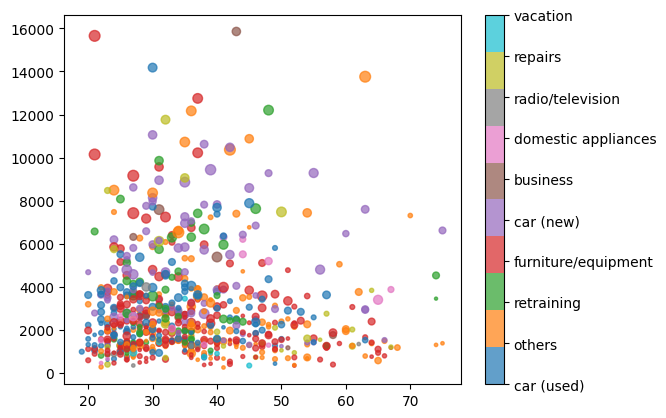

In [73]:
plt.scatter(df1g['age'], df1g['amount'], df1g['duration'], df1g['purpose'], cmap = 'tab10', alpha = 0.7)
plt.colorbar().ax.set_yticklabels(purpose_mod);

C:\Users\64p4h\AppData\Local\Temp\ipykernel_12324\1691326713.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.colorbar().ax.set_yticklabels(purpose_mod);


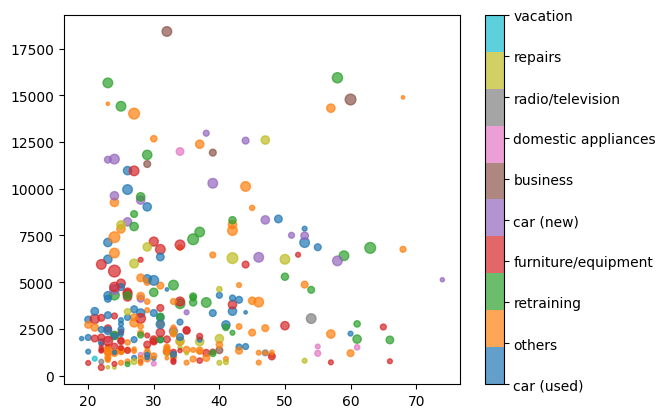

In [74]:
plt.scatter(df1b['age'], df1b['amount'], df1b['duration'], df1b['purpose'], cmap = 'tab10', alpha = 0.7)
plt.colorbar().ax.set_yticklabels(purpose_mod);

,counter,approved,disapproved
status,,,
no checking account,274,139,135
... < 0 DM,269,164,105
0<= ... < 200 DM,63,49,14
... >= 200 DM / salary for at least 1 year,394,348,46


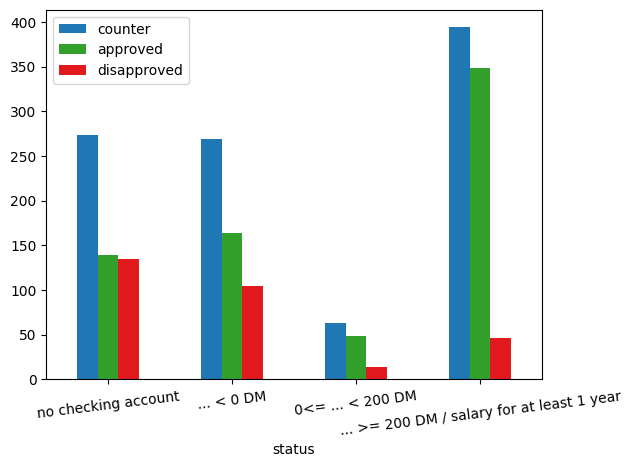

In [158]:
df1['counter?'] = np.ones(df1.shape[0], dtype = np.int32)

df1tmp = df1[['status', 'credit_risk', 'counter?']].groupby('status').sum()
df1tmp['disapproved'] = df1tmp['counter?'] - df1tmp['credit_risk']
df1tmp = df1tmp[['counter?', 'credit_risk', 'disapproved']]
df1tmp = df1tmp.rename(columns = {'credit_risk': 'approved', 'counter?': 'counter'})
df1tmp = df1tmp.rename(index = {i: status_mod[i] for i in range(len(status_mod))})
df1tmp.plot.bar(rot = 7, color={'counter': '#1f78b4', 'approved': '#34a02c', 'disapproved': '#e31a1d'})
#попытка красиво отобразить таблицу дала мелкий текст, так что костыль..
df1tmp

<AxesSubplot: xlabel='duration'>

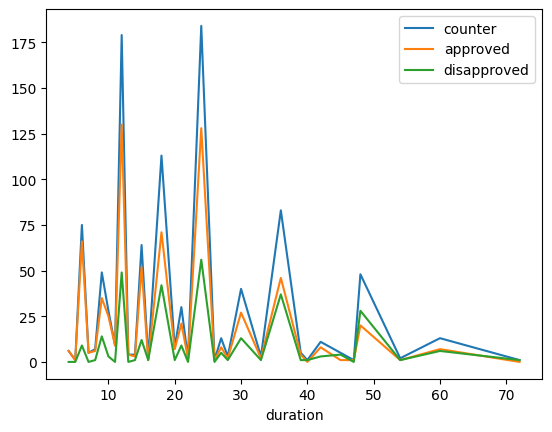

In [149]:
df1tmp = df1[['duration', 'credit_risk', 'counter?']].groupby('duration').sum()
df1tmp['disapproved'] = df1tmp['counter?'] - df1tmp['credit_risk']
df1tmp = df1tmp[['counter?', 'credit_risk', 'disapproved']]
df1tmp = df1tmp.rename(columns = {'credit_risk': 'approved', 'counter?': 'counter'})
df1tmp.plot()

,counter,approved,disapproved
credit_history,,,
critical account/other credits elsewhere,49,21,28
delay in paying off in the past,40,15,25
existing credits paid back duly till now,88,60,28
all credits at this bank paid back duly,293,243,50
no credits taken/all credits paid back duly,530,361,169


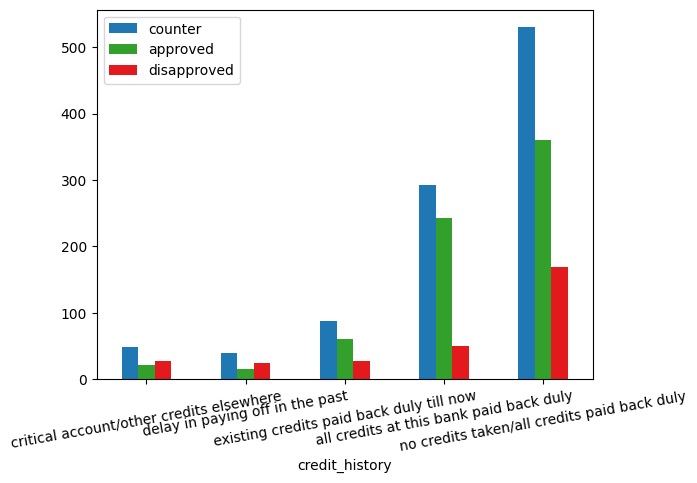

In [160]:
df1tmp = df1[['credit_history', 'credit_risk', 'counter?']].groupby('credit_history').sum()
df1tmp['disapproved'] = df1tmp['counter?'] - df1tmp['credit_risk']
df1tmp = df1tmp[['counter?', 'credit_risk', 'disapproved']]
df1tmp = df1tmp.rename(columns = {'credit_risk': 'approved', 'counter?': 'counter'})
df1tmp = df1tmp.rename(index = {i: credit_history_mod[i] for i in range(len(credit_history_mod))})
df1tmp.plot.bar(rot = 10, color={'counter': '#1f78b4', 'approved': '#34a02c', 'disapproved': '#e31a1d'})
#попытка красиво отобразить таблицу дала мелкий текст, так что костыль..
df1tmp

In [161]:
#молодец, ты идешь вроде как в правильном направлении
#продолжай в том же духе и может быть получится
#не забудь про остальные дела, в частности врач в 16
#и попробуй в графики на duration (выше)